# analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.11.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only



# Load basic functions

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

11056


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only',
             'save_folder':r'H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped',
             'experiment_type': 'DNA',
             'num_threads': 20,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


In [3]:
_fov_id = 45
# create fov class
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=True,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 53
- Number of field of views: 60
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C50', 'H26C26', 'H27C27', 'H28C28', 'H29C29', 'H30C30', 'H31C31', 'H32C32', 'H33C33', 'H34C34', 'H35C35', 'H36C36', 'H37C37', 'H38C38', 'H39C39', 'H40C40', 'H41C41', 'H42C42', 'H43C43', 'H44C44', 'H45C45', 'H46C46', 'H47C47', 'H48C48', 'H49C49', 'H50P1', 'H51C38_c74', 'H52C38_c75'])
- 53 folders are found according to color-usage annotation.
+ loading fov_info from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_45.hdf5
++ base attributes lo

In [ ]:
_overwrite = False
_warp = True
# 2. Process image into candidate spots
fov.parallel = True
fov.combo_ref_id = 0

fov._process_image_to_spots('combo', 
                            #_sel_ids = [74, 75],
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=_warp, 
                            _fit_spots=True,
                            #_fit_in_mask=True, _fitting_args={'seed_mask':dialated_mask},
                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 53 folders
-- checking combo, region:[1 2] in 0.009s.
-- checking combo, region:[3 4] in 0.007s.
-- checking combo, region:[5 6] in 0.007s.
-- checking combo, region:[7 8] in 0.008s.
-- checking combo, region:[ 9 10] in 0.007s.
-- checking combo, region:[11 12] in 0.007s.
-- checking combo, region:[13 14] in 0.007s.
-- checking combo, region:[15 16] in 0.006s.
-- checking combo, region:[17 18] in 0.006s.
-- checking combo, region:[19 20] in 0.006s.
-- checking combo, region:[21 22] in 0.006s.
-- checking combo, region:[23 24] in 0.007s.
-- checking combo, region:[25 26] in 0.007s.
-- checking combo, region:[27 28] in 0.007s.
-- checking combo, region:[29 30] in 0.007s.
-- checking combo, region:[31 32] in 0.007s.
-- checking combo, region:[33 34] in 0.007s.
-- checking combo, region:[35 36] in 0.007s.
-- checking combo, region:[37 38] in 0.007s.
-- checking combo, region:[39 40] in 0.007s.
-- checking combo, region:[41 42] in 0.007s.
-- che

In [5]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    #combo_ids = _grp['ids'][:]

<IPython.core.display.Javascript object>


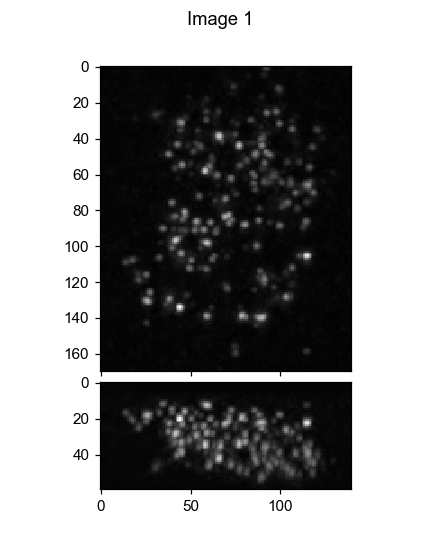

In [6]:
reload(ia.classes.preprocess)
sel_crop = ia.classes.preprocess.ImageCrop_3d([[0,60],[920,1090],[1280,1420]])
visual_tools.imshow_mark_3d_v2([_im[sel_crop.to_slices()] for _im in combo_ims])

In [7]:
single_im_size = fov.shared_parameters['single_im_size']

fov._load_from_file('combo')
# segment nucleus with fitted spots
all_coords = np.concatenate(fov.combo_spots_list)[:,:4]

h = np.histogramdd(all_coords[:,1:], 
               bins=[np.arange(0,single_im_size[0]+1,1),
                     np.arange(0,single_im_size[1]+1,1),
                     np.arange(0,single_im_size[2]+1,1),], 
               weights=all_coords[:,0],
                  )[0]

+ loading combo from file: I:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5
++ finish loading combo in 0.260s. 


# GPU

In [8]:
import math

import torch
import torch.multiprocessing as multiprocessing
import torch.nn.functional as F

print(torch.cuda.device_count())

1


In [9]:
data_dtype = torch.float32
pos_dtype = torch.int16
device = 'cuda:0'


class Gaussian_Kernel_3D(torch.nn.Module):
    def __init__(self, shape, device, image_dtype=data_dtype):
        super(Gaussian_Kernel_3D, self).__init__()

        self.shape = shape
        self.device = device
        self.image_dtype = image_dtype
        

    def _normalized_basis(self, mu, sigma, num_dim):
        _size = self.shape[num_dim]
        _mu = mu[:, num_dim, None]
        _sigma = sigma[:, num_dim, None]

        return (
            1 / (2 * math.pi * _sigma ** 2) ** (1 / 2) *
            torch.exp(- 1 / 2 * ((_mu - torch.arange(_size, dtype=self.image_dtype, device=self.device)) / _sigma) ** 2)
        )

    def forward(self, x, mu, sigma):
        x = torch.einsum('nz,nt->nzt', [self._normalized_basis(mu, sigma,  num_dim=2), x])
        x = torch.einsum('ny,nzt->nyzt', [self._normalized_basis(mu, sigma, num_dim=1), x])
        x = torch.einsum('nx,nyzt->xyzt', [self._normalized_basis(mu, sigma, num_dim=0), x])

        return x

    
    
def normalize(x, mask=None, std=12.0, num_iters=64):
    size = x.shape[-1]

    _x = x.view(-1, size)
    w = torch.ones_like(_x)
    for num_iter in range(num_iters):
        _mean = torch.sum(w * _x, dim=0) / torch.sum(w, dim=0)
        w = torch.exp(-1 / 2 * ((_x - _mean) / std) ** 2)

    x = torch.clamp(x - _mean, min=0)
    if mask is None:
        x = x / torch.mean(x.view(-1, size) ** 2, dim=0).sqrt()
    else:
        x = x / torch.mean(x[mask] ** 2, dim=0).sqrt()

    return x

kernel = Gaussian_Kernel_3D([40,40,40], device=device)

In [10]:
kernel

Gaussian_Kernel_3D()

In [11]:
# load codebook
import pandas as pd
codebook_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv')
codebook_df.set_index('name')
codebook = np.array(codebook_df[[_name for _name in codebook_df.columns if 'NDB_' in _name]])
print(codebook.shape)

(988, 99)


In [12]:
codebook_df

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_824,NDB_712,NDB_818,NDB_940,NDB_872,NDB_934,NDB_926,NDB_910,chr,chr_order
0,1:3740000-3760000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1:6240000-6260000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1:8740000-8760000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,1:11240000-11260000,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,1:13740000-13760000,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,X:161240000-161260000,1057,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,X,52
984,X:163740000-163760000,1058,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,X,53
985,X:166240000-166260000,1059,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,X,54
986,X:168740000-168760000,1060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,X,55


In [13]:
sel_combo_ims = np.array([_im[sel_crop.to_slices()] for _im in combo_ims])

# copy image and encoding matrix into GPU
H = torch.tensor(codebook, dtype=data_dtype).to(device='cuda:0')
#H = torch.cat([H, torch.ones(1, H.shape[1], dtype=data_dtype).to(device=device)], dim=0) # background
Y = torch.tensor(sel_combo_ims.transpose(1,2,3,0).astype(np.float32), 
                 dtype=data_dtype).to(device='cuda:0')
#C = torch.tensor(C, dtype=dtype).to(device=torch.cuda.device)

Y = normalize(Y,)

In [14]:
n_regs, n_bits = H.shape
size_z, size_x, size_y, n_bits = Y.shape
print(n_regs, n_bits)
print(size_z, size_x, size_y)

988 99
60 170 140


In [15]:
fov._load_from_file('combo')

all_spots = np.concatenate([_spots for _spots in fov.combo_spots_list]) 
all_bits = np.concatenate([_i*np.ones(len(_spots), dtype=np.int32) for _i,_spots in enumerate(fov.combo_spots_list)])


+ loading combo from file: I:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5


In [ ]:
S

In [18]:
reload(ia.classes.preprocess)
from ImageAnalysis3.classes.preprocess import Spots3D

cand_spots = []
cand_bits = []
for _id, _spots in zip(fov.combo_ids, fov.combo_spots_list):
    _kept_spots = sel_crop.crop_spots(_spots)
    _bits = np.ones(len(_kept_spots), dtype=np.int32) * _id
    # append
    cand_spots.append(_kept_spots)
    cand_bits.append(_bits)

cand_spots = Spots3D(np.concatenate(cand_spots), 
                      bits=np.concatenate(cand_bits), 
                      pixel_size=fov.shared_parameters['distance_zxy'])
cand_coords = cand_spots.to_positions()
del(cand_bits)

In [55]:
pair_dist = 150

from scipy.spatial import KDTree
tree = KDTree(cand_coords)

kdtree_spot_pairs = tree.query_pairs(pair_dist, eps=0.5)
print(len(kdtree_spot_pairs))

8904


In [173]:
from tqdm import tqdm

# analyze valid pairs from codebook
from itertools import combinations

valid_pairs = []
valid_pair_species = []
for _icode, _code in enumerate(codebook):
    for _p in combinations(np.where(_code)[0], 2):
        if _p not in valid_pairs:
            valid_pairs.append(_p)
            valid_pair_species.append(_icode)
        else:
            print(_icode, valid_pairs)


In [161]:

# scoring spot Tuple
class SpotTuple():
    """Tuple of coordinates"""
    def __init__(self, 
                 spots_tuple:Spots3D,
                 bits:np.ndarray,
                 pixel_size:np.ndarray or list,
                 spots_inds=None,
                 tuple_id=None,
                 ):
        # add spot Tuple
        self.spots = spots_tuple[:].copy()
        # add information for bits
        # add the new attribute to the created instance
        if isinstance(bits, int):
            self.bits = np.ones(len(self.spots), dtype=np.int32) * int(bits)
        elif bits is not None and np.size(bits) == 1:
            self.bits = np.ones(len(self.spots), dtype=np.int32) * int(bits[0])
        elif bits is not None:
            self.bits = np.array(bits[:len(self.spots)], dtype=np.int32) 
        elif spots_tuple.bits is not None:
            self.bits = spots_tuple.bits[:len(self.spots)]
        else:
            self.bits = bits

        self.pixel_size = np.array(pixel_size)
        
        self.spots_inds = spots_inds
        self.tuple_id = tuple_id
        
        

    def dist_internal(self):
        from scipy.spatial.distance import pdist
        _self_coords = self.spots.to_positions(self.pixel_size)
        return pdist(_self_coords)

    def intensities(self):
        return self.spots.to_intensities()
    def intensity_mean(self):
        return np.mean(self.spots.to_intensities())

    def centroid_spot(self):
        self.centroid = np.mean(self.spots, axis=0, keepdims=True)
        return self.centroid

    def dist_centroid_to_spots(self, spots:Spots3D):
        from scipy.spatial.distance import cdist
        if not hasattr(self, 'centroid'):
            _cp = self.centroid_spot()
        else:
            _cp = getattr(self, 'centroid')
        _centroid_coords = _cp.to_positions(pixel_size=self.pixel_size)
        _target_coords = spots.to_positions(pixel_size=self.pixel_size)
        return cdist(_centroid_coords, _target_coords)[0]

    def dist_to_spots(self, 
                      spots:Spots3D):
        from scipy.spatial.distance import cdist
        _self_coords = self.spots.to_positions(pixel_size=self.pixel_size)
        _target_coords = spots.to_positions(pixel_size=self.pixel_size)
        return cdist(_self_coords, _target_coords)

    def dist_chromosome(self):
        pass


        
    
sp = SpotTuple(cand_spots[:2], [0,0], pixel_size=fov.shared_parameters['distance_zxy'])
#sp.dist_to_spot(spots_1)
sp.dist_centroid_to_spots(cand_spots[:2])

array([4128.72891768, 4128.72891768])

In [162]:
sp.tuple_id

In [163]:
class SpotPair(SpotTuple):
    """Pair of fitted spots"""
    def __init__(self, 
                 spots_pair:Spots3D,
                 bits:np.ndarray,
                 pixel_size:np.ndarray or list,
                 ):
        """Initialize as SpotTuple"""
        super().__init__(spots_tuple=spots_pair[:2], bits=bits, pixel_size=pixel_size)len(_inds_list)
        

In [131]:
sp = SpotPair(cand_spots[:2], [0,0], pixel_size=fov.shared_parameters['distance_zxy'])
#sp.dist_to_spot(spots_1)
sp.dist_internal()

array([8257.45783537])

In [194]:
sel_spots_groups = []

_inds_list = []

for _p in tqdm(kdtree_spot_pairs):
    # get codes for this pair
    _code_pair = tuple(cand_spots.bits[np.array(_p)])
    if _code_pair in valid_pairs:

        _bts = cand_spots.bits[np.array(_p)]
        _spots = cand_spots[np.array(_p)]

        _sp = SpotPair(_spots, bits=_bts, pixel_size=fov.shared_parameters['distance_zxy'])
        # find species and matched bit
        _species = valid_pair_species[valid_pairs.index(tuple(_sp.bits))]
        _matched_bits = np.setdiff1d(np.where(codebook[_species])[0], _sp.bits)

        #print(_p, _sp.bits, _sp.centroid_spot(), _matched_bits)
        _nb_spot_ids = np.array(tree.query_ball_point(_sp.centroid_spot().to_positions(_sp.pixel_size)[0], pair_dist*1.5))
        _nb_spot_ids = np.setdiff1d(_nb_spot_ids, _p) # exclude self

        if len(_nb_spot_ids) > 0:
            _nb_spots = Spots3D(cand_spots[_nb_spot_ids], bits=cand_spots.bits[_nb_spot_ids], pixel_size=_sp.pixel_size)
            _matched_nb_indices = np.array([_i for _i, _b in enumerate(_nb_spots.bits) if _b in _matched_bits])
            if len(_matched_nb_indices) > 0:
                _matched_nb_spots = _nb_spots[_matched_nb_indices]
                _matched_nb_dists = _sp.dist_centroid_to_spots(_matched_nb_spots)

                for _matched_nb_id, _matched_nb_spot in zip(_nb_spot_ids, _matched_nb_spots):
                    # only select the closest one
                    #_matched_nb_id = _nb_spot_ids[np.argmin(_matched_nb_dists)]
                    #_matched_nb_spot = _matched_nb_spots[np.argmin(_matched_nb_dists)]
                    _sel_species.append(_species)
                    # merge spots
                    _merged_spots = Spots3D(np.concatenate([_sp.spots, [_matched_nb_spot]]))

                    _merged_tuple = SpotTuple(_merged_spots, 
                                              bits=np.concatenate([_sp.bits, [cand_spots.bits[_matched_nb_id]]]), 
                                              pixel_size=_sp.pixel_size,
                                              spots_inds=np.array(list(_p)+[_matched_nb_id]),
                                              tuple_id=_species,
                                              )
                    if tuple(np.sort(_merged_tuple.spots_inds)) not in _inds_list:
                        sel_spots_groups.append(_merged_tuple)
                        _inds_list.append(tuple(np.sort(_merged_tuple.spots_inds)))
            else:
                _merged_tuple = SpotTuple(_sp.spots, 
                                        bits=_sp.bits, 
                                        pixel_size=_sp.pixel_size,
                                        spots_inds=np.array(list(_p)),
                                        tuple_id=_species,
                                        )
                if tuple(np.sort(_merged_tuple.spots_inds)) not in _inds_list:
                    sel_spots_groups.append(_merged_tuple)
                    _inds_list.append(tuple(np.sort(_merged_tuple.spots_inds)))

100%|█████████████████████████████████████████████████████████████████████████████| 8904/8904 [00:46<00:00, 192.07it/s]


In [195]:
len(sel_spots_groups)

5603

In [200]:
# find isolated_tuple
def ind_usage(self, all_inds):
    if isinstance(all_inds, list) and isinstance(all_inds[0], np.ndarray):
        _all_inds = np.concatenate(all_inds)
    else:
        _all_inds = np.array(all_inds)
    _matches = []
    for _ind in self.spots_inds:
        _matches.append(np.sum(_all_inds==_ind))
    
    return np.array(_matches)

In [ ]:
def select_isolated_spots(_groups, )

In [285]:
ct  =0

_coords, _ids = [],[]
_species = []

for _g in sel_spots_groups:
    _inds_usage = is_isolated(_g, sel_group_inds)
    if (_inds_usage==1).all() and len(_g.spots_inds)>2:
        ct += 1
        _coords.append(_g.spots.to_positions(_g.pixel_size).mean(0))
        _ids.append(_g.tuple_id)
        _species.append(_g.tuple_id)
_coords = np.array(_coords)
_ids = np.array(_ids)
_species = np.array(_species)
print(len(_coords))

1255


In [275]:
len(sel_spots_groups)

5603

In [266]:
ct = 0

_coords, _ids = [],[]
_species = []

for _g in sel_spots_groups:
    #_inds_usage = is_isolated(_g, sel_group_inds)
    #if (_inds_usage==1).all() and len(_g.spots_inds)>2:
    #    ct += 1
    _coords.append(_g.spots.to_positions(_g.pixel_size).mean(0))
    _ids.append(_g.tuple_id)
    _species.append(_g.tuple_id)
    
_coords = np.array(_coords)
_ids = np.array(_ids)
_species = np.array(_species)

<IPython.core.display.Javascript object>


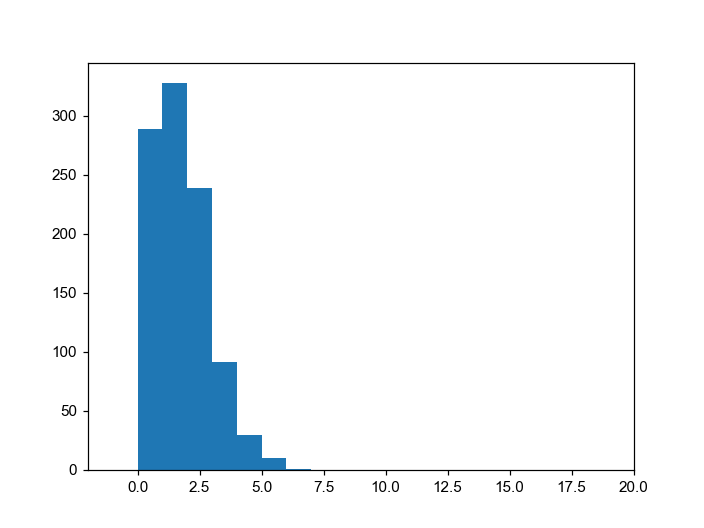

1255.0


In [286]:
sel_species, sel_counts = np.unique(_species, return_counts=True)
usage_vec = np.zeros(len(codebook))
usage_vec[sel_species] = sel_counts

plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(usage_vec, bins=np.arange(-1,20))
plt.show()

print(usage_vec.sum())

In [287]:
np.unique(codebook_df['chr_order'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [288]:
#id_2_chr = {_id:_chr for _id, _chr in zip(codebook_df['id'],codebook_df['chr'])}
#id_2_chr = {_i:_chr for _i, _chr in enumerate(codebook_df['chr'])}
id_2_chr = {}
for _i, _chr in enumerate(codebook_df['chr']):
    if _chr == 'X':
        id_2_chr[_i] = 20
    elif _chr == 'Y':
        id_2_chr[_i] = 21
    else:
        id_2_chr[_i] = int(_chr)
        
id_2_chrid = {_i:_chrid for _i, _chrid in enumerate(codebook_df['chr_order'])}

In [289]:
_chrs = np.array([id_2_chr[_id] for _id in _ids])
_chrids = np.array([id_2_chrid[_id] for _id in _ids])

<IPython.core.display.Javascript object>


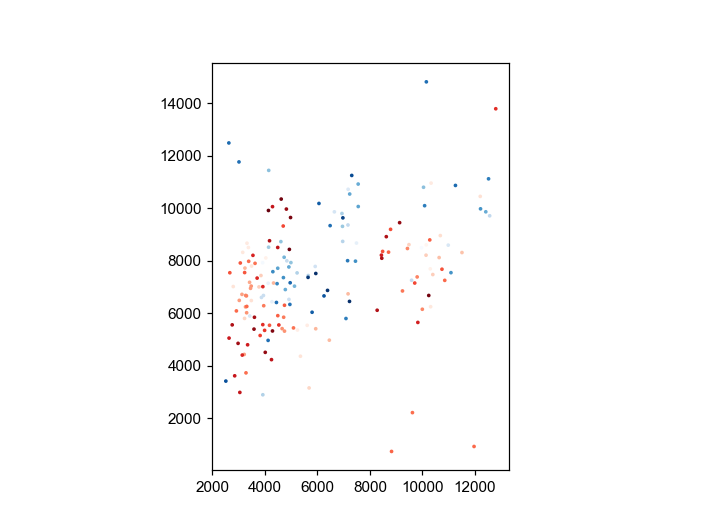

In [290]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,2], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,2], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


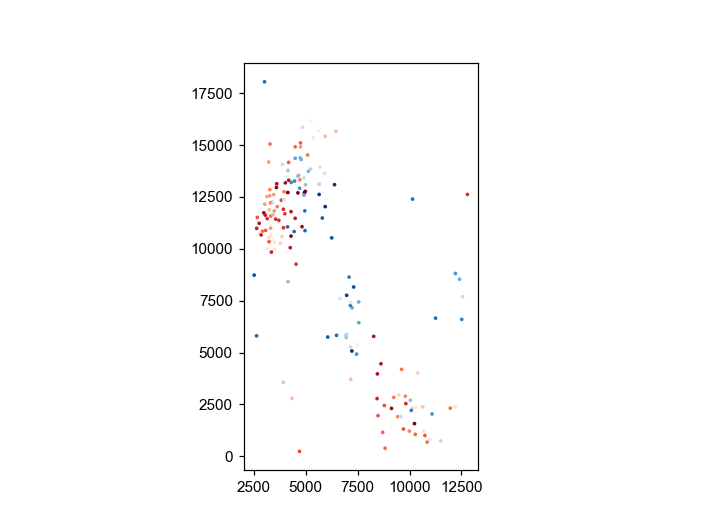

In [292]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,1], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,1], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


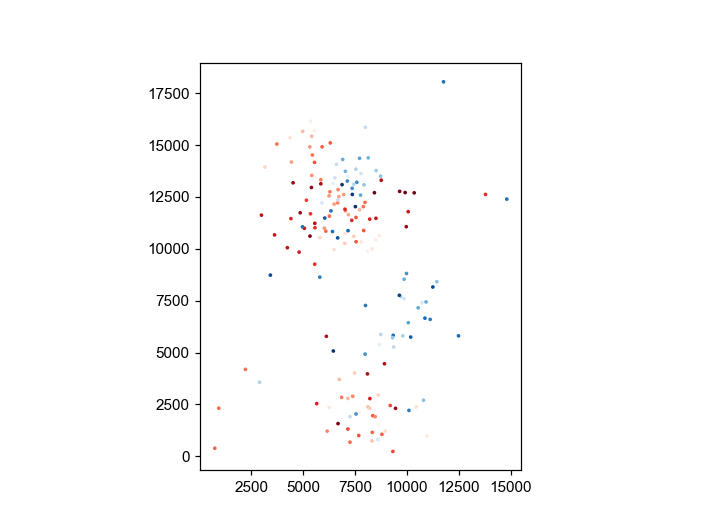

In [293]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,2], _coords[_chrs==sel_chr,1], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,2], _coords[_chrs==sel_chr,1], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

In [208]:
_g.tuple_id

200

In [252]:
id_2_chrid

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 0,
 78: 1,
 79: 2,
 80: 3,
 81: 4,
 82: 5,
 83: 6,
 84: 7,
 85: 8,
 86: 9,
 87: 10,
 88: 11,
 89: 12,
 90: 13,
 91: 14,
 92: 15,
 93: 16,
 94: 17,
 95: 18,
 96: 19,
 97: 20,
 98: 21,
 99: 22,
 100: 23,
 101: 24,
 102: 25,
 103: 26,
 104: 27,
 105: 28,
 106: 29,
 107: 30,
 108: 31,
 109: 32,
 110: 33,
 111: 34,
 112: 35,


In [207]:
ct

1255

In [205]:
ct

1831

In [178]:
_intensities = [_g.intensities() for _g in sel_spots_groups]

In [196]:
sel_group_inds = [_g.spots_inds for _g in sel_spots_groups]

In [197]:
sel_group_inds

[array([1322, 6984, 2117]),
 array([ 7504, 13605]),
 array([ 1517,  5626, 14698]),
 array([1153, 3058, 3978]),
 array([ 4963, 17117, 12847]),
 array([2438, 8645]),
 array([10026, 12094,  1015]),
 array([ 9793, 13913]),
 array([2967, 7691]),
 array([ 6095, 12254,  8544]),
 array([ 427, 5629, 4741]),
 array([12608, 15230,  2086]),
 array([ 6527, 13315,   979]),
 array([ 7249, 11461,  1881]),
 array([ 5974, 13912,  7676]),
 array([ 5396, 13313,  4663]),
 array([10172, 17123, 17316]),
 array([ 4313, 10446]),
 array([3445, 4715, 8383]),
 array([3484, 5708]),
 array([ 1161, 15482, 12037]),
 array([ 75, 254]),
 array([ 8066, 10623]),
 array([4380, 8423, 5360]),
 array([ 5457, 16584,  1589]),
 array([3490, 5843, 3115]),
 array([10559, 12836]),
 array([14747, 15730,  2733]),
 array([10560, 12152]),
 array([ 2327, 12609, 10003]),
 array([ 2669, 13707,  2897]),
 array([3819, 7295,  442]),
 array([ 1501, 15467]),
 array([12304, 17108,  2409]),
 array([ 4313, 13820,  6744]),
 array([13103, 17211,  

In [186]:
len(_inds_list)

6866

In [188]:
np.unique(_inds_list).shape

(5603,)

In [174]:
# search valid
sel_spot_pairs = []
sel_spot_species = []
sel_code_pairs = []

for _spot_pair in tqdm(spot_pairs):
    # get codes for this pair
    _code_pair = tuple(cand_spots.bits[np.array(_spot_pair)])
    if _code_pair in valid_pairs:
        sel_spot_pairs.append(_spot_pair)
        sel_spot_species.append(valid_pair_species[valid_pairs.index(_code_pair)])
        sel_code_pairs.append(_code_pair)
        
sel_species, sel_counts = np.unique(sel_spot_species, return_counts=True)
plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(sel_counts, bins=np.arange(30))
plt.show()

print(len(sel_spot_pairs))

NameError: name 'spot_pairs' is not defined

In [ ]:
def scoring spots

In [ ]:
def scoring_spot_tuples()

In [ ]:
spot_usage = np.zeros(len(cand_spots), dtype=np.int32)
max_spot_usage = 2



In [171]:
_merged_tuple.bits


array([ 7, 38, 11])

39

In [147]:
_matched_nb_id

7120

In [148]:
_nb_spot_ids

array([7120, 7160])

In [153]:
list(_p)+[_matched_nb_id]

[4659, 11690, 7120]

In [145]:
np.argmin(_matched_nb_dists)

0

In [140]:
_merged_tuple.dist_internal()

array([117.07449903,  66.15334376,  72.89642846])

[878,
 395,
 68,
 668,
 212,
 409,
 45,
 494,
 926,
 748,
 348,
 787,
 605,
 198,
 688,
 665,
 718,
 84,
 614,
 445,
 119,
 128,
 156,
 601,
 296,
 582,
 152,
 520,
 177,
 172,
 267,
 671,
 964,
 723,
 44,
 481,
 346,
 7,
 823,
 43,
 358,
 312,
 26,
 949,
 242,
 59,
 977,
 629,
 673,
 366,
 347,
 219,
 38,
 658,
 655,
 98,
 45,
 833,
 459,
 608,
 785,
 596,
 458,
 648,
 686,
 540,
 817,
 225,
 358,
 921,
 869,
 342,
 105,
 729,
 440,
 874,
 390,
 536,
 505,
 511,
 954,
 402,
 962,
 319,
 709,
 367,
 375,
 694,
 689,
 62,
 608,
 758,
 366,
 94,
 728,
 278,
 514,
 26,
 0,
 199,
 412,
 360,
 625,
 796,
 12,
 341,
 756,
 219,
 605,
 562,
 135,
 373,
 341,
 867,
 772,
 899,
 470,
 304,
 665,
 352,
 19,
 952,
 735,
 546,
 928,
 152,
 255,
 210,
 674,
 878,
 441,
 117,
 544,
 259,
 496,
 366,
 971,
 489,
 721,
 805,
 552,
 672,
 674,
 297,
 869,
 450,
 928,
 748,
 257,
 237,
 665,
 325,
 24,
 281,
 742,
 712,
 783,
 626,
 116,
 626,
 243,
 499,
 304,
 184,
 662,
 582,
 965,
 557,
 897,
 865,


<IPython.core.display.Javascript object>


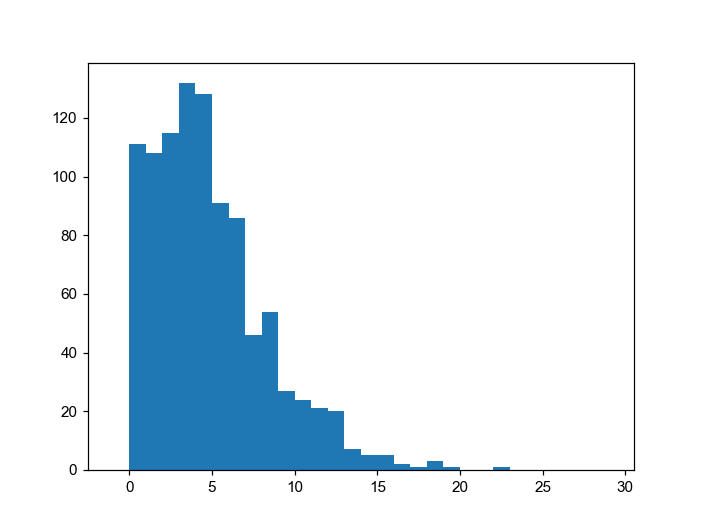

4305.0


In [92]:
sel_species, sel_counts = np.unique(_sel_species, return_counts=True)
usage_vec = np.zeros(len(codebook))
usage_vec[sel_species] = sel_counts

plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(usage_vec, bins=np.arange(-1,30))
plt.show()

print(usage_vec.sum())

In [52]:
_matched_nb_spots

Spots3D([[ 6.8034492e+03,  1.7000000e+01,  1.2100000e+02,  4.5000000e+01,
           3.9858802e-04,  1.5000001e+00,  1.5000001e+00,  1.5000002e+00,
          -1.3803945e-09,  3.8391061e-08,  3.9779236e+02]], dtype=float32)

In [49]:
_nb_spots.bits, _matched_bits

(array([21]), array([21], dtype=int64))

In [47]:
_nb_spots.bits == _matched_bits

array([ True])

In [45]:
np.intersect1d(_nb_spots.bits, _matched_bits)


array([21], dtype=int64)

In [633]:
tree

In [629]:
_nb_spot_ids

array([7178])

In [618]:
_nb_spots.bits

array([39])

1

878

In [563]:
len(cand_spots)

17530

In [564]:
spot_pairs

{(1322, 6984),
 (7938, 9245),
 (7504, 13605),
 (1863, 15149),
 (1517, 5626),
 (1153, 3058),
 (4963, 17117),
 (3988, 4165),
 (2438, 8645),
 (10026, 12094),
 (9793, 13913),
 (4009, 11220),
 (2967, 7691),
 (6095, 12254),
 (427, 5629),
 (814, 6395),
 (12608, 15230),
 (6527, 13315),
 (7249, 11461),
 (5974, 13912),
 (5396, 13313),
 (10172, 17123),
 (4313, 10446),
 (3445, 4715),
 (10610, 11496),
 (3484, 5708),
 (1161, 15482),
 (1576, 10734),
 (2325, 9760),
 (75, 254),
 (8066, 10623),
 (11042, 11724),
 (4380, 8423),
 (3131, 7177),
 (5457, 16584),
 (3490, 5843),
 (10559, 12836),
 (8073, 11637),
 (14747, 15730),
 (10560, 12152),
 (798, 8741),
 (2327, 12609),
 (1853, 2200),
 (2669, 13707),
 (3819, 7295),
 (1501, 15467),
 (12304, 17108),
 (10263, 13484),
 (4313, 13820),
 (13103, 17211),
 (14078, 15226),
 (6420, 14169),
 (7276, 15598),
 (10761, 12130),
 (2081, 8539),
 (11847, 13421),
 (2644, 4267),
 (12981, 13343),
 (5868, 14077),
 (9755, 13855),
 (9547, 14322),
 (9568, 13539),
 (1790, 10067),
 (13

<IPython.core.display.Javascript object>


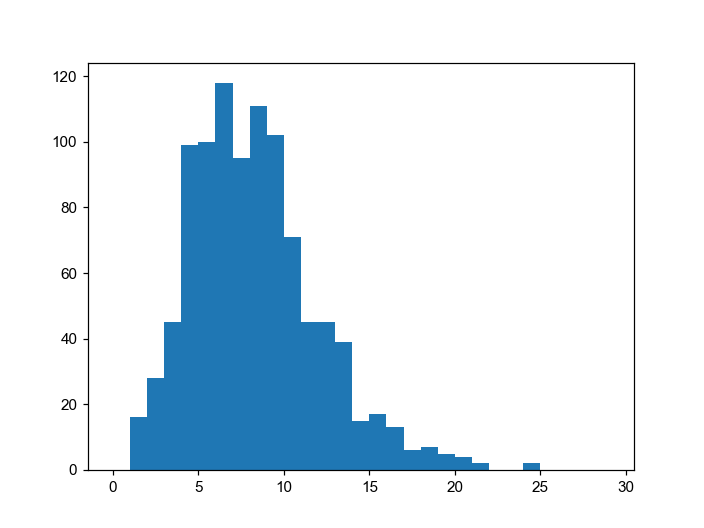

In [311]:
_code_pair

(7, 38)

In [327]:
valid_pairs.index((36,62))

0

In [283]:
tree.query_ball_point(cand_coords[1], 250)

[1, 15236]

In [281]:
cand_bits[tree.query_ball_point(cand_coords[1], 250)]

array([ 0, 86])

In [244]:
all_bits[np.argsort(_dists)[:10]]

array([26, 96, 60, 90, 36, 32, 19, 31, 31, 44])

In [247]:
len(all_coords)

17530

In [248]:
_dists[np.argsort(_dists)[:10]]

array([   0.        ,   62.98074468,  144.2086529 ,  184.84228333,
        304.50494817,  317.900323  ,  487.78496439,  990.96224053,
       1076.49462415, 1086.05833841])

In [246]:
#"seeding_mat = np.zeros(list(Y.shape[:-1])+[n_regs])

neighbor_radius = 250
from scipy.spatial.distance import pdist

all_coords = all_spots[:,1:4] * fov.shared_parameters['distance_zxy']

sel_seeds, sel_bits = [], []

for _bit in range(n_bits):
    # check valid overlapping bits
    _valid_species = np.where(codebook[:,_bit])[0]
    _valid_overlaps = [_b for _b in np.where(codebook[_valid_species].sum(0) > 0)[0] if _b != _bit]
    # loop through neighbors to find matched spots
    for _ic in np.where(all_bits==_bit)[0]:
        _coord = all_coords[_ic]
        _dists = np.linalg.norm(all_coords - _coord, axis=1)
        _neighbors = np.where(_dists < neighbor_radius)[0]
        _nb_bits = all_bits[_neighbors]
        for _b, _nb in zip(_nb_bits, _neighbors):
            if _b in _valid_overlaps:    
                # get seed region id
                _nb_seed = all_coords[_nb]
                # get region id for this seed
                _seed_reg_ids = np.intersect1d(np.where(codebook[:,_b])[0], 
                                               np.where(codebook[:,_bit])[0])
                # append the seed
                _sel_seed = (all_spots[_ic,1:4] + all_spots[_nb,1:4]) / 2
                #seeding_mat[tuple(list(np.round((_seed+_nb_seed)/2).astype(np.int32)))][_seed_reg_ids] = 1        
                if len(sel_seeds)==0 or np.linalg.norm(np.array(sel_seeds) - _sel_seed, axis=1).min() > 0 :
                    sel_seeds.append(_sel_seed)
                    sel_bits.append(_seed_reg_ids[0])
                    
    print(_bit, len(sel_seeds), len(sel_bits))



0 358 358
1 680 680
2 1043 1043
3 1407 1407
4 1772 1772
5 2044 2044
6 2362 2362
7 2743 2743
8 3117 3117
9 3490 3490
10 3809 3809
11 4148 4148
12 4468 4468
13 4750 4750
14 5063 5063
15 5441 5441
16 5772 5772
17 6070 6070
18 6375 6375
19 6686 6686
20 6953 6953
21 7258 7258
22 7491 7491
23 7827 7827
24 8101 8101
25 8426 8426
26 8655 8655
27 8955 8955
28 9217 9217
29 9489 9489
30 9710 9710
31 9942 9942
32 10155 10155
33 10395 10395
34 10642 10642
35 10872 10872
36 11092 11092
37 11301 11301
38 11509 11509
39 11767 11767
40 12000 12000
41 12237 12237
42 12434 12434
43 12675 12675
44 12867 12867
45 13066 13066
46 13248 13248
47 13418 13418
48 13573 13573
49 13754 13754
50 13953 13953
51 14136 14136
52 14324 14324
53 14479 14479
54 14642 14642
55 14804 14804
56 14970 14970
57 15150 15150
58 15288 15288
59 15442 15442
60 15570 15570
61 15707 15707
62 15793 15793
63 15904 15904
64 16086 16086
65 16171 16171
66 16280 16280
67 16435 16435
68 16572 16572
69 16685 16685
70 16815 16815
71 16911 1691

In [236]:
_nb

17392

In [235]:
_nb_seed, _seed_reg_ids

(array([  5628.34072113, 114354.10986328, 142015.20117188]),
 array([90], dtype=int64))

In [227]:
_neighbors

array([  173,  3125, 10897, 14918], dtype=int64)

In [204]:
sel_coords

array([[  5104.70962524, 113833.76660156, 142967.88720703],
       [  5672.13153839, 110727.92285156, 150597.91845703],
       [  8686.42711639, 105616.34033203, 144506.82128906],
       ...,
       [  5599.9956131 , 104934.61669922, 146235.66503906],
       [  9668.20430756, 104139.73828125, 150757.62451172],
       [ 10583.64200592, 106502.58764648, 142934.25585938]])

In [148]:
reload(classes.preprocess)
classes.preprocess.Spots([1,2,3])[1:]

In __new__ with class <class 'ImageAnalysis3.classes.preprocess.Spots'>
In array_finalize:
   self type is <class 'ImageAnalysis3.classes.preprocess.Spots'>
   obj type is <class 'NoneType'>
In __init__ with class <class 'ImageAnalysis3.classes.preprocess.Spots'>
In array_finalize:
   self type is <class 'ImageAnalysis3.classes.preprocess.Spots'>
   obj type is <class 'ImageAnalysis3.classes.preprocess.Spots'>


Spots([], shape=(0, 2, 3), dtype=float64)

<function numpy.prod(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [141]:
test_crop

[array([ True]), array([False]), array([False])]

In [128]:
test_crop.to_slices()

(slice(0, 10, None), slice(10, 20, None), slice(20, 30, None))

In [129]:
reload(classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\__init__.py'>

In [142]:
?np.ndarray

In [143]:
np.float

float

In [ ]:
def select_spots_in_crop(spots:np.ndarray,
                         crop:ImageCrop_3d,
                         ):
    """Select spots in given 3d crop"""
    

In [28]:
len(all_bits)/3

329486.0

In [149]:
np.asarray([1,2,3])

array([1, 2, 3])

In [ ]:
# given